In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import os
import glob
folders_1 = os.listdir('data/금융사기용의자의 연령대별 지역데이터')
folders_2 = os.listdir('data/금융사기피해자의 연령대별 지역데이터')

def make_csv(folders,folderpath):
    with open(folderpath[:-1]+'.csv', 'w',encoding='UTF-8') as outfile:
        for filename in folders:
            with open(folderpath+filename, encoding='UTF-8') as file:        
                outfile.write(file.read())


make_csv(folders_1,"data/금융사기용의자의 연령대별 지역데이터/")
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
make_csv(folders_2,'data/금융사기피해자의 연령대별 지역데이터/')
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)

In [2]:
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
## 지역별 시구군
seoul = '종로구 중구 용산구 성동구 광진구 동대문구 중랑구 성북구 강북구 도봉구 노원구 은평구 서대문구 마포구 양천구 강서구 구로구 금천구 영등포구 동작구 관악구 서초구 강남구 송파구 강동구'.split(' ')
busan = '중구 서구 동구 영도구 부산진구 동래구 남구 북구 강서구 해운대구 사하구 금정구 연제구 수영구 사상구 기장군'.split(' ')
daegu = '중구 동구 서구 남구 북구 수성구 달서구 달성군'.split(' ')
incheon = '중구 동구 미추홀구 연수구 남동구 부평구 계양구 서구 강화군 옹진군'.split(' ')
gwangju = '동구 서구 남구 북구 광산구'.split(' ')
daejun = '동구 중구 서구 유성구 대덕구'.split(' ')
ulsan = '중구 남구 동구 북구 울주군'.split(' ')
gg = '남양주시 수원시 성남시 의정부시 안양시 부천시 광명시 동두천시 평택시 안산시 고양시 과천시 구리시 오산시 시흥시 군포시 의왕시 하남시 용인시 파주시 이천시 안성시 김포시 화성시 광주시 양주시 포천시 여주시 연천군 가평군 양평군'.split(' ')
gangwon = '춘천시 원주시 강릉시 동해시 태백시 속초시 삼척시 홍천군 횡성군 영월군 평창군 정선군 철원군 화천군 양구군 인제군 고성군 양양군'.split(' ')
chungbuk='청주시 충주시 제천시 보은군 옥천군 영동군 증평군 진천군 괴산군 음성군 단양군'.split(' ')
chungnam='천안시 공주시 보령시 아산시 서산시 논산시 계룡시 당진시 금산군 부여군 서천군 청양군 홍성군 예산군 태안군'.split(' ')
jeonbuk='전주시 군산시 익산시 정읍시 남원시 김제시 완주군 진안군 무주군 장수군 임실군 순창군 고창군 부안군'.split(' ')
jeonnam='목포시 여수시 순천시 나주시 광양시 담양군 곡성군 구례군 고흥군 보성군 화순군 장흥군 강진군 해남군 영암군 무안군 함평군 영광군 장성군 완도군 진도군 신안군'.split(' ')
geonbuk='포항시 경주시 김천시 안동시 구미시 영주시 영천시 상주시 문경시 경산시 군위군 의성군 청송군 영양군 영덕군 청도군 고령군 성주군 칠곡군 예천군 봉화군 울진군 울릉군'.split(' ')
geonnam ='창원시 진주시 통영시 사천시 김해시 밀양시 거제시 양산시 의령군 함안군 창녕군 고성군 남해군 하동군 산청군 함양군 거창군 합천군'.split(' ')
jeju='제주시 서귀포시'.split(' ')
sejong = '세종시'.split(' ')
all_region = seoul+ busan +daegu +incheon+gwangju+daejun+ulsan+gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju+sejong
part = gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju
def delete_detail_region(region):
    region = str(region)
    if len(region) > 4:
        region=region[0:3]
        for i in all_region:
            if i in region:
                return i
            else:
                return region
    else:
        return region

df_suspect_origin['법정시군구명']=df_suspect_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))
df_victim_origin['법정시군구명']=df_victim_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))

a = list(df_victim_origin['생년구간'].unique()) #2090-2100 2070-2080 => 각각 1개 5개 제외
a.remove ('2090-2100')
a.remove('2070-2080')
a= sorted(a)


b = list(df_suspect_origin['생년구간'].unique()) # 2080-2090 => 1개 제외
b.remove('2080-2090')
b = sorted(b)

region_s = [seoul,busan,daegu,incheon,gwangju,daejun,ulsan,gg ,gangwon ,chungbuk,chungnam,jeonbuk,jeonnam,geonbuk,geonnam ,jeju, sejong]
region_b = ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','세종특별자치시']
region = []
DF = []
for b in range(17):
    for s in region_s[b]:
        DF.append ([region_b[b],s])
        for old in a: # a로 들어가야 전부 들어감
            region.append([region_b[b],s,old])

#DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)
#suspect_DF = DF
#victim_DF = DF

DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)                   

suspect_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
victim_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')


def return_cnt(df,row):
    temp = df[(df['광역시도명']==row['광역시도명'])&(df['법정시군구명']==row['법정시군구명'])&(df['생년구간']==row['생년구간'])]
    return temp['광역시도명'].count()

suspect_Old_DF['발생건수'] = suspect_Old_DF.apply(lambda x: return_cnt(df_suspect_origin,x),axis=1)
victim_Old_DF['발생건수'] = victim_Old_DF.apply(lambda x: return_cnt(df_victim_origin,x),axis=1)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')

In [3]:
suspect_Old_DF=suspect_Old_DF[suspect_Old_DF['법정시군구명']!='세종시']
victim_Old_DF=victim_Old_DF[victim_Old_DF['법정시군구명']!='세종시']

In [4]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수
0,서울특별시,종로구,1900-1910,0
1,서울특별시,종로구,1910-1920,0
2,서울특별시,종로구,1920-1930,0
3,서울특별시,종로구,1930-1940,0
4,서울특별시,종로구,1940-1950,1
...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6
2732,제주특별자치도,서귀포시,1980-1990,7
2733,제주특별자치도,서귀포시,1990-2000,26
2734,제주특별자치도,서귀포시,2000-2010,29


In [5]:
victim_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수
0,서울특별시,종로구,1900-1910,0
1,서울특별시,종로구,1910-1920,0
2,서울특별시,종로구,1920-1930,0
3,서울특별시,종로구,1930-1940,0
4,서울특별시,종로구,1940-1950,1
...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,40
2732,제주특별자치도,서귀포시,1980-1990,103
2733,제주특별자치도,서귀포시,1990-2000,157
2734,제주특별자치도,서귀포시,2000-2010,205


In [6]:
from scipy import stats

In [14]:
suspect_Old_DF['발생건수'].mean()

12.552631578947368

In [15]:
victim_Old_DF['발생건수'].mean()

93.56396198830409

# 용의자 수와 피해자 수의 상관관계
## 용의자가 증가하면 피해자도 증가함(당연한 원리)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

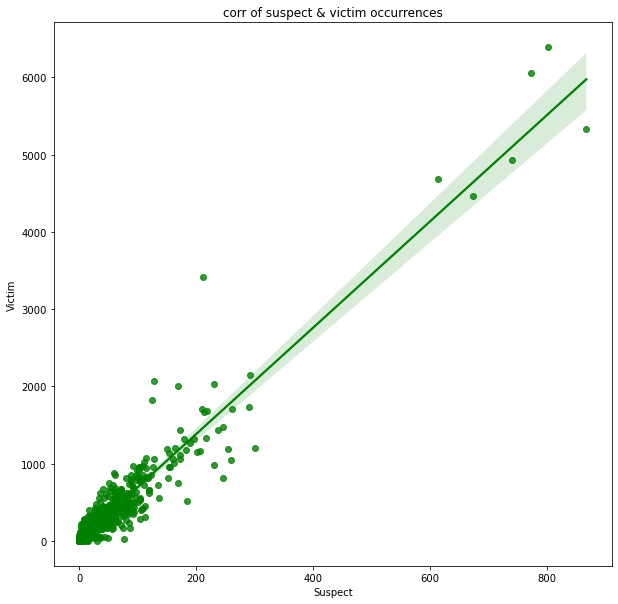

In [42]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=suspect_Old_DF['발생건수'], y=victim_Old_DF['발생건수'], fit_reg=True, color='g')
plt.xlabel('Suspect')
plt.ylabel('Victim')
plt.title('corr of suspect & victim occurrences')
plt.show()

In [44]:
print(stats.pearsonr(suspect_Old_DF['발생건수'], victim_Old_DF['발생건수']))

(0.9611937883483485, 0.0)


# 용의자 수와 피해자 수는 독립이 아님 -> 상관관계가 있다. -> paired t test
## 결과 같은지역의 같은 나이대의 용의자와 같은지역의 같은 나이대의 피해자는 대부분 큰 차이가 난다.
## ex>
## 서울지역 10대 용의자 발생건수3, 서울지역 10대 피해자 발생건수 37
## 부산지역 20대 용의자 발생건수20, 부산지역 20대 피해자 발생건구 3


# 1. 용의자 , 피해자 발생건수 paired t test

# 두집단간 평균의 차이 검증
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수  차이의 평균은 유의하다.

In [23]:
stat, p_val = stats.ttest_rel(suspect_Old_DF['발생건수'], victim_Old_DF['발생건수'])

In [24]:
print('statistic:', stat, '   p-value:', p_val)

statistic: -14.815370754485038    p-value: 7.929501025352936e-48


# 2. 지역별 용의자, 피해자 paired t test
## 결론: 제주, 전북, 전북, 대전이 용의자와 피해자 발생건수 차이의 평균이 적은편이다.
## 그러나 그래도 차이가 크며 모든 지역별 용의자와 피해자 발생건수의 차이가 크다.

## 1. 서울지역의 연령대별 용의자 발생건수 & 서울지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [25]:
s_seoul=suspect_Old_DF[suspect_Old_DF['광역시도명']=='서울특별시']
v_seoul=victim_Old_DF[victim_Old_DF['광역시도명']=='서울특별시']

In [27]:
stat, p_val = stats.ttest_rel(s_seoul['발생건수'], v_seoul['발생건수'])

In [28]:
print('statistic:', stat, '   p-value:', p_val)

statistic: -6.2691276051415015    p-value: 1.2666108018700027e-09


## 2. 부산지역의 연령대별 용의자 발생건수 & 부산지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [29]:
s_busan=suspect_Old_DF[suspect_Old_DF['광역시도명']=='부산광역시']
v_busan=victim_Old_DF[victim_Old_DF['광역시도명']=='부산광역시']

In [30]:
stat, p_val = stats.ttest_rel(s_busan['발생건수'], v_busan['발생건수'])

In [31]:
print('statistic:', stat, '   p-value:', p_val)

statistic: -7.698571295569615    p-value: 7.205287717743478e-13


## 3. 대구지역의 연령대별 용의자 발생건수 & 대구지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [35]:
s_daegu=suspect_Old_DF[suspect_Old_DF['광역시도명']=='대구광역시']
v_daegu=victim_Old_DF[victim_Old_DF['광역시도명']=='대구광역시']
stat, p_val = stats.ttest_rel(s_daegu['발생건수'], v_daegu['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -5.433447385133574    p-value: 4.2531985638271236e-07


## 4. 인천지역의 연령대별 용의자 발생건수 & 인천지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [36]:
s_incheon=suspect_Old_DF[suspect_Old_DF['광역시도명']=='인천광역시']
v_incheon=victim_Old_DF[victim_Old_DF['광역시도명']=='인천광역시']
stat, p_val = stats.ttest_rel(s_incheon['발생건수'], v_incheon['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -5.758542446203536    p-value: 6.761844728204058e-08


## 5. 광주지역의 연령대별 용의자 발생건수 & 광주지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [37]:
s_gwangju=suspect_Old_DF[suspect_Old_DF['광역시도명']=='광주광역시']
v_gwangju=victim_Old_DF[victim_Old_DF['광역시도명']=='광주광역시']
stat, p_val = stats.ttest_rel(s_gwangju['발생건수'], v_gwangju['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -4.20730364113355    p-value: 8.91883417639372e-05


## 6. 대전지역의 연령대별 용의자 발생건수 & 대전지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.0001~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [45]:
s_daejeon=suspect_Old_DF[suspect_Old_DF['광역시도명']=='대전광역시']
v_daejeon=victim_Old_DF[victim_Old_DF['광역시도명']=='대전광역시']
stat, p_val = stats.ttest_rel(s_daejeon['발생건수'], v_daejeon['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -4.172806104229146    p-value: 0.00010025965490735056


## 7. 울산지역의 연령대별 용의자 발생건수 & 울산지역의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [46]:
s_ulsan=suspect_Old_DF[suspect_Old_DF['광역시도명']=='울산광역시']
v_ulsan=victim_Old_DF[victim_Old_DF['광역시도명']=='울산광역시']
stat, p_val = stats.ttest_rel(s_ulsan['발생건수'], v_ulsan['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -4.916642240447365    p-value: 7.372982639520534e-06


## 8. 경기도의 연령대별 용의자 발생건수 & 경기도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [47]:
s_gyeonggi =suspect_Old_DF[suspect_Old_DF['광역시도명']=='경기도']
v_gyeonggi=victim_Old_DF[victim_Old_DF['광역시도명']=='경기도']
stat, p_val = stats.ttest_rel(s_gyeonggi['발생건수'], v_gyeonggi['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -8.983975362807874    p-value: 1.342106446290648e-17


## 9. 강원도의 연령대별 용의자 발생건수 & 강원도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [48]:
s_gangwon =suspect_Old_DF[suspect_Old_DF['광역시도명']=='강원도']
v_gangwon=victim_Old_DF[victim_Old_DF['광역시도명']=='강원도']
stat, p_val = stats.ttest_rel(s_gangwon['발생건수'], v_gangwon['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -5.681700317063347    p-value: 4.304120412404422e-08


## 10. 충청북도의 연령대별 용의자 발생건수 & 충청북도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [49]:
s_chungbuk =suspect_Old_DF[suspect_Old_DF['광역시도명']=='충청북도']
v_chungbuk=victim_Old_DF[victim_Old_DF['광역시도명']=='충청북도']
stat, p_val = stats.ttest_rel(s_chungbuk['발생건수'], v_chungbuk['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -3.0352899382935714    p-value: 0.0028993887594367584


## 11. 충청남도의 연령대별 용의자 발생건수 & 충청남도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [50]:
s_chungnam =suspect_Old_DF[suspect_Old_DF['광역시도명']=='충청남도']
v_chungnam=victim_Old_DF[victim_Old_DF['광역시도명']=='충청남도']
stat, p_val = stats.ttest_rel(s_chungnam['발생건수'], v_chungnam['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -4.577164188393519    p-value: 8.791019271919133e-06


## 12. 전라북도의 연령대별 용의자 발생건수 & 전라북도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [51]:
s_jeollabuk =suspect_Old_DF[suspect_Old_DF['광역시도명']=='전라북도']
v_jeollabuk=victim_Old_DF[victim_Old_DF['광역시도명']=='전라북도']
stat, p_val = stats.ttest_rel(s_jeollabuk['발생건수'], v_jeollabuk['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -3.8165156426869298    p-value: 0.00019037320516811202


## 13. 전라남도의 연령대별 용의자 발생건수 & 전라남도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [52]:
s_jeollanam =suspect_Old_DF[suspect_Old_DF['광역시도명']=='전라남도']
v_jeollanam=victim_Old_DF[victim_Old_DF['광역시도명']=='전라남도']
stat, p_val = stats.ttest_rel(s_jeollanam['발생건수'], v_jeollanam['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -6.3060823973645785    p-value: 1.2038579984079244e-09


## 14. 경상북도의 연령대별 용의자 발생건수 & 경상북도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [53]:
s_gyeongbuk=suspect_Old_DF[suspect_Old_DF['광역시도명']=='경상북도']
v_gyeongbuk=victim_Old_DF[victim_Old_DF['광역시도명']=='경상북도']
stat, p_val = stats.ttest_rel(s_gyeongbuk['발생건수'], v_gyeongbuk['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -5.727494889565686    p-value: 2.6685157735227256e-08


## 15. 경상남도의 연령대별 용의자 발생건수 & 경상남도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [54]:
s_gyeongnam=suspect_Old_DF[suspect_Old_DF['광역시도명']=='경상남도']
v_gyeongnam=victim_Old_DF[victim_Old_DF['광역시도명']=='경상남도']
stat, p_val = stats.ttest_rel(s_gyeongnam['발생건수'], v_gyeongnam['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -4.502008422511186    p-value: 1.1030060499171048e-05


## 16. 제주특별자치도의 연령대별 용의자 발생건수 & 제주특별자치도의 연령대별 피해자 발생건수
## 귀무가설: 용의자와 피해자 수 차이의 평균은 유의하지 않다
## 결론 pvalue 가 0.00~ 이므로 귀무가설 기각 후 대립가설채택 용의자와 피해자 발생건수 차이의 평균은 유의하다.

In [55]:
s_jeju=suspect_Old_DF[suspect_Old_DF['광역시도명']=='제주특별자치도']
v_jeju=victim_Old_DF[victim_Old_DF['광역시도명']=='제주특별자치도']
stat, p_val = stats.ttest_rel(s_jeju['발생건수'], v_jeju['발생건수'])
print('statistic:', stat, '   p-value:', p_val)

statistic: -3.0292552129287866    p-value: 0.005965591010417483
